# Analysis
To get the segment id:
* Go to the activity
* Go to the Segments table 
* Click on the desired segment
* Click the button: `View full leaderboard`
* Get the segment id from the new URL: https://www.strava.com/segments/{SID}?filter=overall 

In [12]:
import helium
import pandas as pd
import os
from IPython.display import Image, display
import time
img_dir='img'
def get_segment_img(img_dir,sid):
    segment_link='https://www.strava.com/segments/{}'.format(sid)
    if not os.path.isfile('{}/{}.png'.format(img_dir,sid)):
        helium.start_chrome(segment_link)#,headless=True)
        helium.click('×')
        time.sleep(5)
        helium.get_driver().save_screenshot('{}/{}.png'.format(img_dir,sid))
    else:
        helium.start_chrome(segment_link,headless=True)
    segment_name=helium.get_driver().find_element_by_id('js-full-name').text
    helium.kill_browser()
    return segment_link,segment_name
os.makedirs(img_dir,exist_ok=True)

def get_segment(img_dir,sid):
    sl,sn=get_segment_img(img_dir,sid)
    display(Image(filename='{}/{}.png'.format(img_dir,sid),width=500))
    print(sl)
    return df[df.Name.str.contains(sn)].drop('Info',axis='columns').sort_values('Time')

Load data base

In [2]:
db_file='db/strava.json'
df=pd.read_json(db_file).reset_index(drop=True)
df['date']=df.Info.apply(lambda d: d.get('date'))

# Activities
TODO: Fix `'time'`

In [3]:
lt=df[df.Info.apply(lambda d: d.get('name'))=='La Tuna']

In [4]:
pd.DataFrame( list(lt.drop_duplicates('date').Info.values) ).sort_values('time',ascending=False)

,Calories,Elapsed Time,Speed,date,distance,elevation,energy,name,power,time
1,"{'Avg': '590', 'Max': '590'}","{'Avg': '59:50', 'Max': '59:50'}","{'Avg': '8.8km/h', 'Max': '59.8km/h'}","2:31 PM on Monday, May 25, 2020",8.56km,468m,530kJ,La Tuna,468m,58:07
2,"{'Avg': '888', 'Max': '888'}","{'Avg': '1:00:43', 'Max': '1:00:43'}","{'Avg': '8.3km/h', 'Max': '56.5km/h'}","2:15 PM on Saturday, May 23, 2020",7.10km,454m,796kJ,La Tuna,454m,51:27
3,"{'Avg': '479', 'Max': '479'}","{'Avg': '34:15', 'Max': '34:15'}","{'Avg': '7.9km/h', 'Max': '56.9km/h'}","2:24 PM on Sunday, May 3, 2020",4.50km,302m,430kJ,La Tuna,302m,34:08
0,"{'Avg': '611', 'Max': '611'}","{'Avg': '1:08:13', 'Max': '1:08:13'}","{'Avg': '7.8km/h', 'Max': '57.6km/h'}","1:49 PM on Sunday, May 24, 2020",8.20km,447m,548kJ,La Tuna,447m,1:03:18


# Main segments

In [5]:
df['Time']=pd.to_datetime(df['Time'],format= '%M:%S' ).dt.time

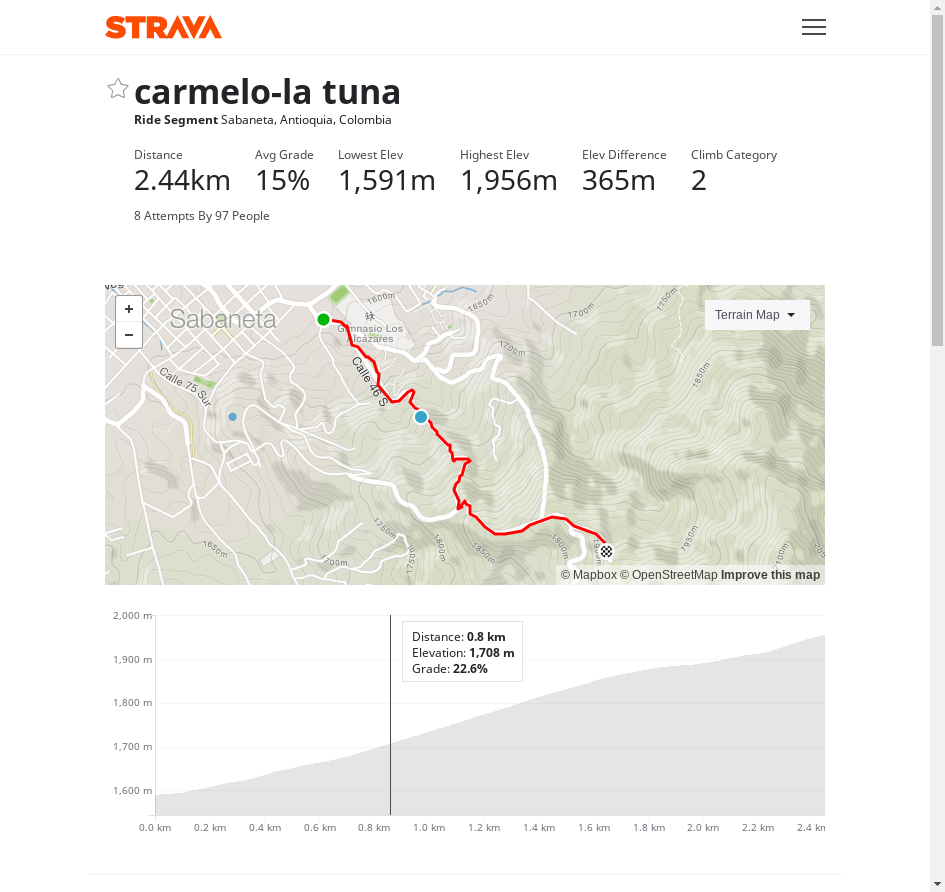

https://www.strava.com/segments/24056728


,Name,Power,Speed,Time,date
38,carmelo-la tuna 2.44km 365m 15%,316W,3.8km/h,00:38:25,"2:15 PM on Saturday, May 23, 2020"
12,carmelo-la tuna 2.44km 365m 15%,180W,3.7km/h,00:39:27,"1:49 PM on Sunday, May 24, 2020"
74,carmelo-la tuna 2.44km 365m 15%,180W,3.7km/h,00:39:27,"1:49 PM on Sunday, May 24, 2020"
6,carmelo-la tuna 2.44km 365m 15%,180W,3.6km/h,00:40:30,"2:31 PM on Monday, May 25, 2020"


In [6]:
sid=24056728
get_segment(img_dir,sid)

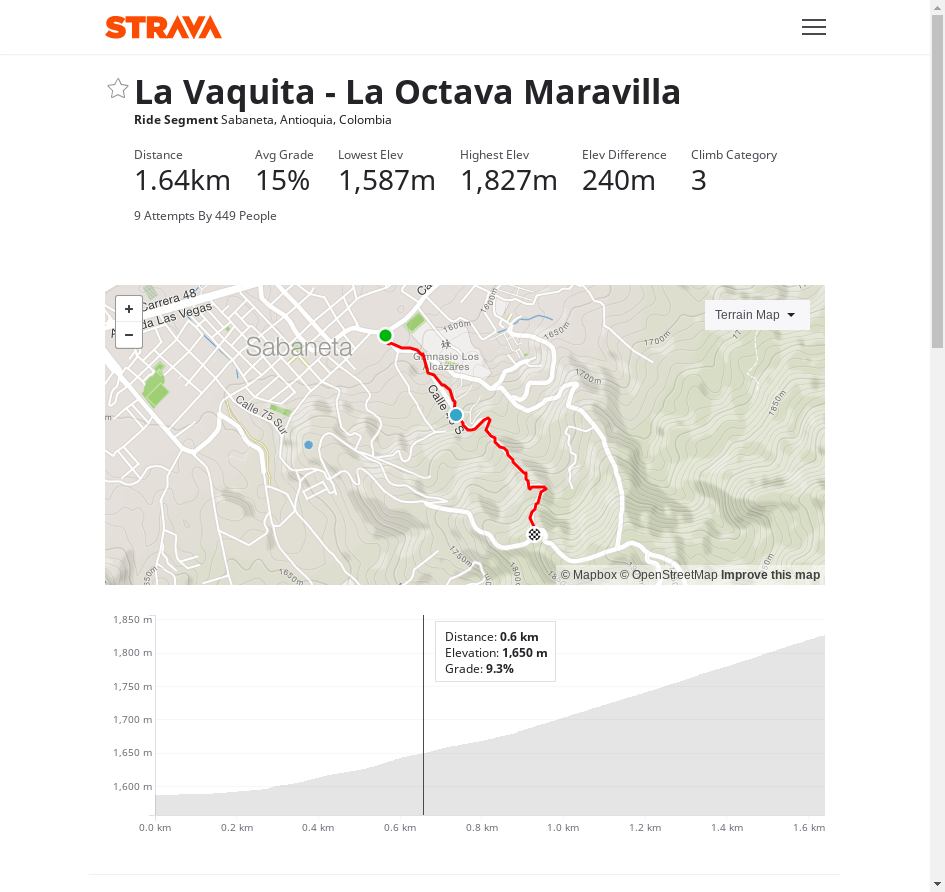

https://www.strava.com/segments/24056820


,Name,Power,Speed,Time,date
60,La Vaquita - La Octava Maravilla 1.64km 240m...,204W,4.2km/h,00:23:27,"2:24 PM on Sunday, May 3, 2020"
36,La Vaquita - La Octava Maravilla 1.64km 240m...,308W,4.0km/h,00:24:54,"2:15 PM on Saturday, May 23, 2020"
28,La Vaquita - La Octava Maravilla 1.64km 240m...,176W,3.8km/h,00:25:49,"1:49 PM on Sunday, May 24, 2020"
71,La Vaquita - La Octava Maravilla 1.64km 240m...,176W,3.8km/h,00:25:49,"1:49 PM on Sunday, May 24, 2020"
3,La Vaquita - La Octava Maravilla 1.64km 240m...,176W,3.8km/h,00:26:12,"2:31 PM on Monday, May 25, 2020"


In [7]:
sid=24056820
get_segment(img_dir,sid)

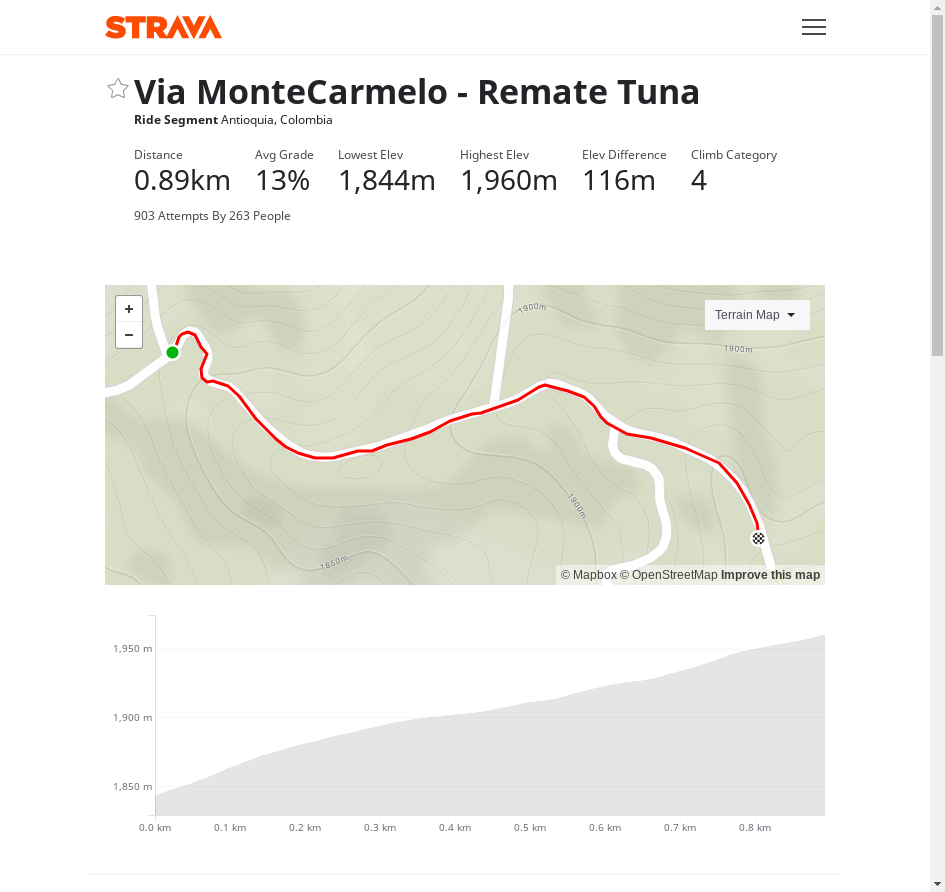

https://www.strava.com/segments/19751989


,Name,Power,Speed,Time,date
11,Via MonteCarmelo - Remate Tuna 0.89km 116m 13%,191W,3.8km/h,00:14:02,"2:31 PM on Monday, May 25, 2020"
56,Via MonteCarmelo - Remate Tuna 0.89km 116m 13%,187W,3.8km/h,00:14:05,"1:49 PM on Sunday, May 24, 2020"
77,Via MonteCarmelo - Remate Tuna 0.89km 116m 13%,187W,3.8km/h,00:14:05,"1:49 PM on Sunday, May 24, 2020"


In [8]:
sid=19751989
get_segment(img_dir,sid)

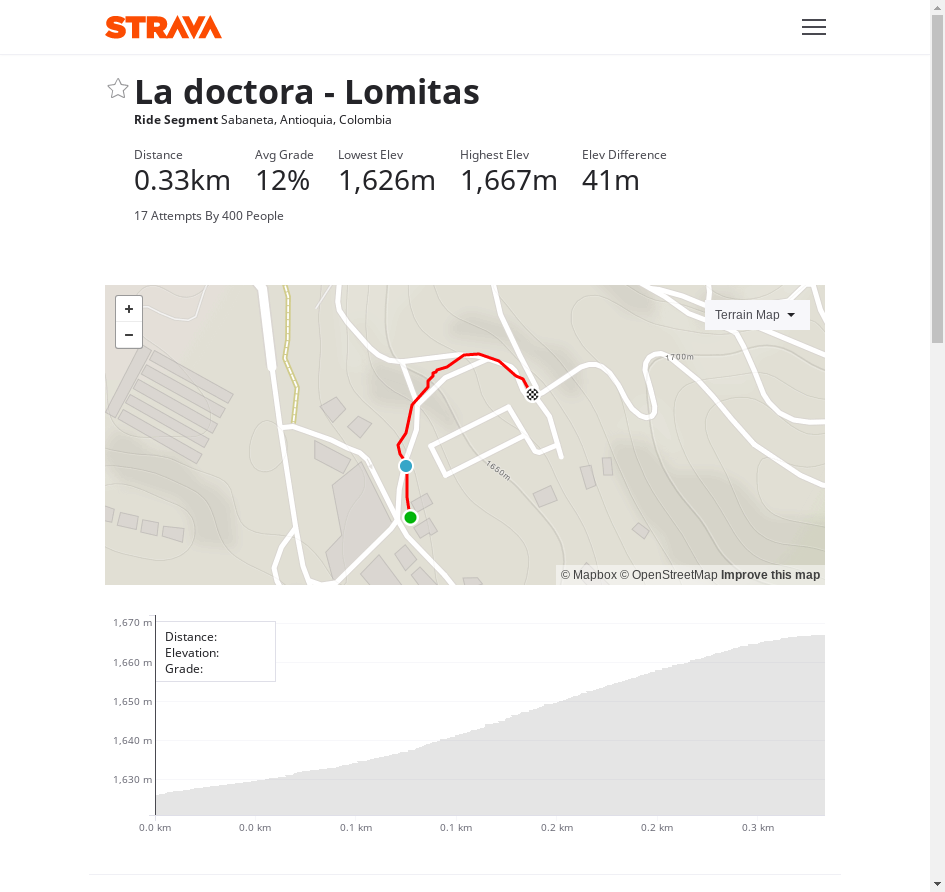

https://www.strava.com/segments/24056784


,Name,Power,Speed,Time,date
34,La doctora - Lomitas 0.33km 41m 12%,223W,5.5km/h,00:03:39,"1:49 PM on Sunday, May 24, 2020"
81,La doctora - Lomitas 0.33km 41m 12%,223W,5.5km/h,00:03:39,"1:49 PM on Sunday, May 24, 2020"
43,La doctora - Lomitas 0.33km 41m 12%,338W,5.0km/h,00:04:01,"2:15 PM on Saturday, May 23, 2020"


In [9]:
sid=24056784
get_segment(img_dir,sid)

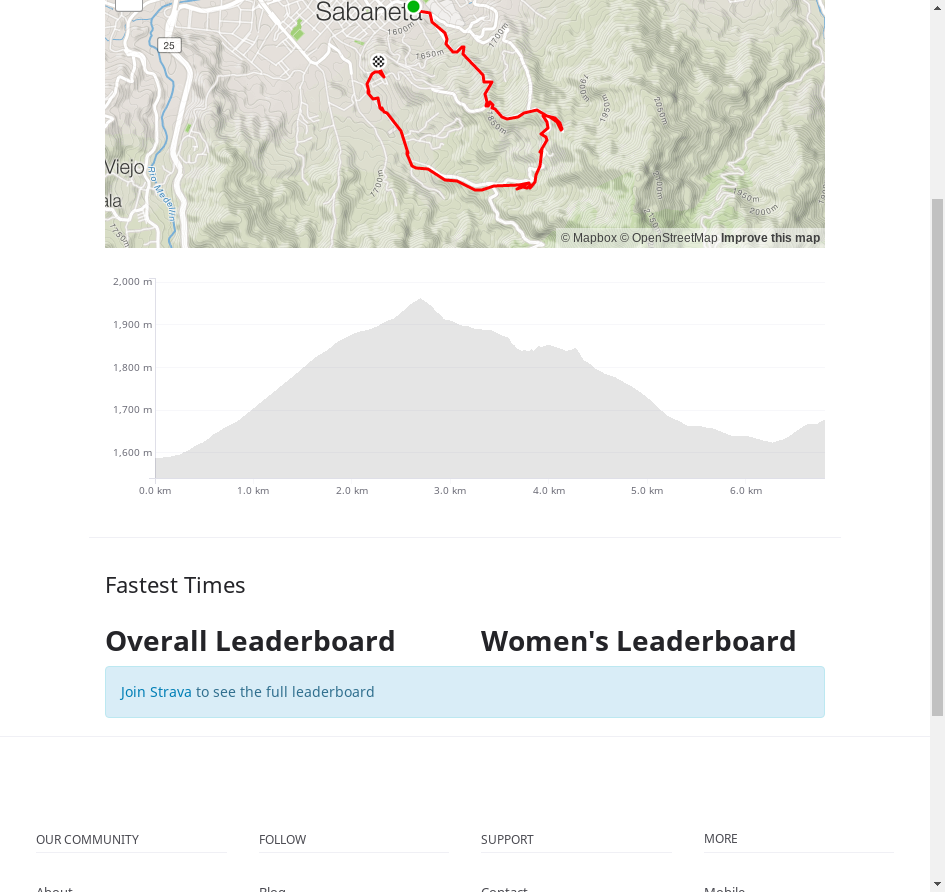

https://www.strava.com/segments/24191207


,Name,Power,Speed,Time,date
72,La Vaquita - La Tuna - descenso Del Taburete -...,139W,6.9km/h,00:59:06,"1:49 PM on Sunday, May 24, 2020"


In [11]:
sid=24191207
get_segment(img_dir,sid)